In [5]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

from numba import njit, prange
from pyts.image import MarkovTransitionField

import tsia.plot
import tsia.markov
import tsia.network_graph

In [15]:
DATA = 'data'
df = pd.read_csv(os.path.join(DATA, 'signal-1.csv'))
df['timestamp'] = pd.to_datetime(df['timestamp'], format = '%Y-%m-%dT%H:%M:%S.%f')
df = df.set_index('timestamp')

In [16]:
df

,value
timestamp,
2017-07-01 00:00:00,141.221088
2017-07-01 01:00:00,145.801993
2017-07-01 02:00:00,141.738005
2017-07-01 03:00:00,142.970690
2017-07-01 04:00:00,147.413282
...,...
2017-12-31 19:00:00,145.421720
2017-12-31 20:00:00,141.264127
2017-12-31 21:00:00,147.575580


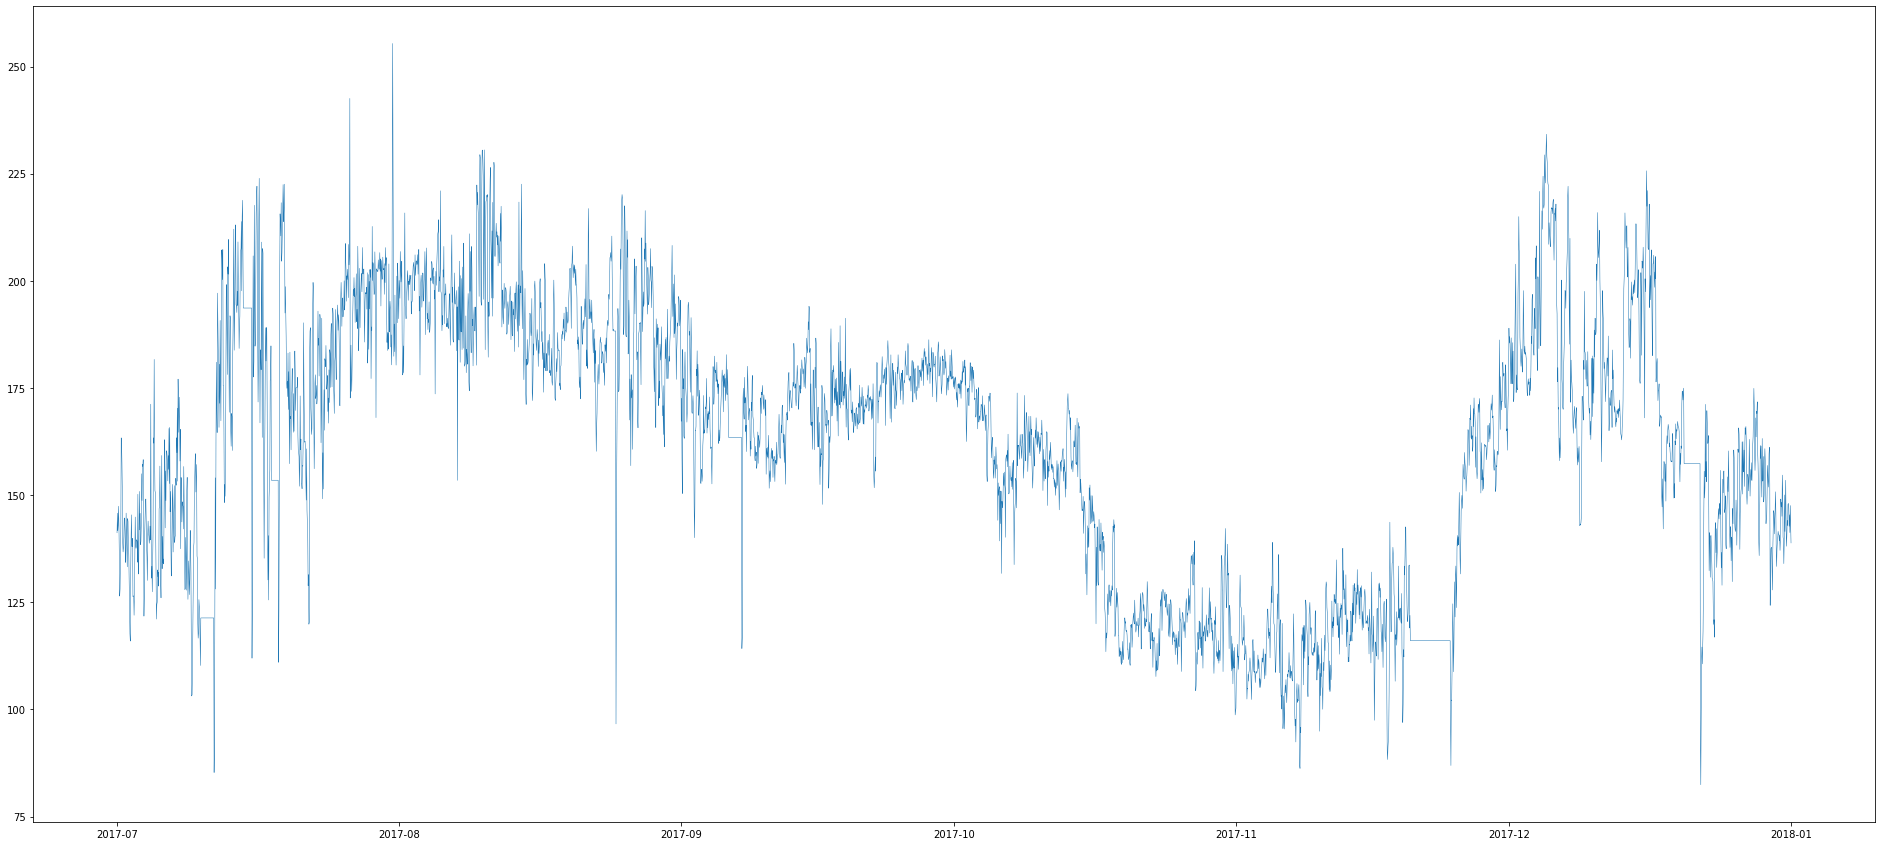

In [14]:
fig = plt.figure(figsize = (33,15))
plt.plot(df, linewidth = 0.5)
plt.show()

In [18]:
n_bins = 8
strategy = 'quantile'
X = df.values.reshape(1, -1)
n_samples, n_timestamps = X.shape

mtf = MarkovTransitionField(image_size = 48, n_bins = n_bins, strategy = strategy)
t_mtf = mtf.fit_transform(X)

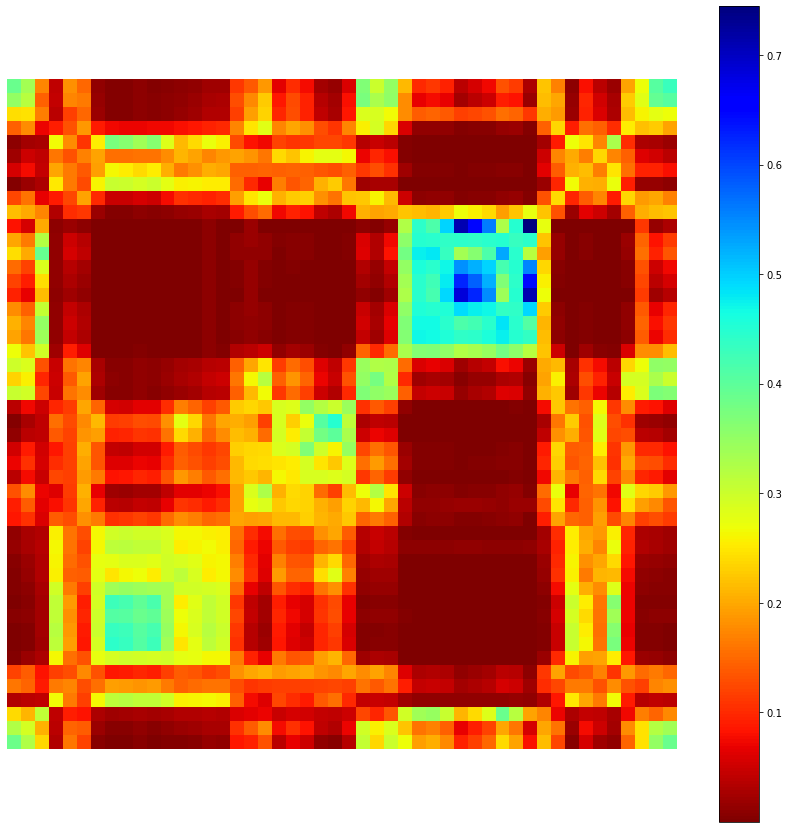

In [21]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
_, mappable_image = tsia.plot.plot_markov_transition_field(mtf = t_mtf[0], ax = ax, reversed_cmap = True)
plt.colorbar(mappable_image);

In [24]:
X_binned, bin_edges = tsia.markov.discretize(df)

In [28]:
[print(x) for x in X_binned] 

2
2
2
2
2
2
1
1
1
1
2
3
3
3
2
2
1
2
2
2
2
2
1
1
2
2
1
1
2
2
2
1
1
1
0
0
1
2
2
2
2
2
1
1
1
1
1
1
2
2
2
2
2
2
1
2
1
1
2
2
2
2
2
2
2
2
2
3
2
3
2
1
1
2
2
2
2
2
2
1
1
2
2
2
2
2
2
2
2
4
2
1
1
1
1
2
3
3
5
3
2
2
2
1
1
1
1
1
1
1
1
2
2
3
2
1
1
2
3
1
2
1
1
1
2
3
3
2
2
2
3
3
3
3
2
3
2
3
2
3
2
2
2
1
1
2
2
2
1
2
2
2
2
2
2
2
2
3
3
4
2
5
4
3
4
4
3
3
2
2
2
2
2
2
2
2
2
2
2
1
1
2
1
1
2
2
1
1
1
1
1
1
1
2
2
1
0
0
0
0
1
1
2
2
2
2
3
3
2
3
2
1
1
1
0
0
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
2
1
3
5
4
3
7
6
5
4
3
5
4
6
5
4
6
7
7
7
7
5
5
3
2
2
2
2
4
6
7
6
5
7
7
7
5
4
5
6
6
3
3
4
4
3
5
6
7
7
5
6
7
7
7
6
6
6
7
6
7
7
6
6
6
6
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
1
5
7
5
5
7
7
6
6
7
7
7
7
7
6
4
5
7
7
7
4
6
5
5
7
6
3
7
7
4
2
1
2
3
5
6
5
6
6
4
2
1
2
1
2
2
2
5
5
6
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
1
2
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
7
6
6
5
4
5
4
5
4
5
4
3
5
4
4
3
4
4
5
5
4
3
4
3
5
5
5
4
4
4
4
4
5
3
3
3
3
2
3
4
3
3
2
2
2
3
2
3
6
4
4
3
3
3
2
2


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [29]:
bin_edges

array([ 82.4318845 , 118.41579271, 137.42079667, 156.7783225 ,
       166.35528917, 175.224915  , 183.85208333, 196.53184021,
       255.378145  ])

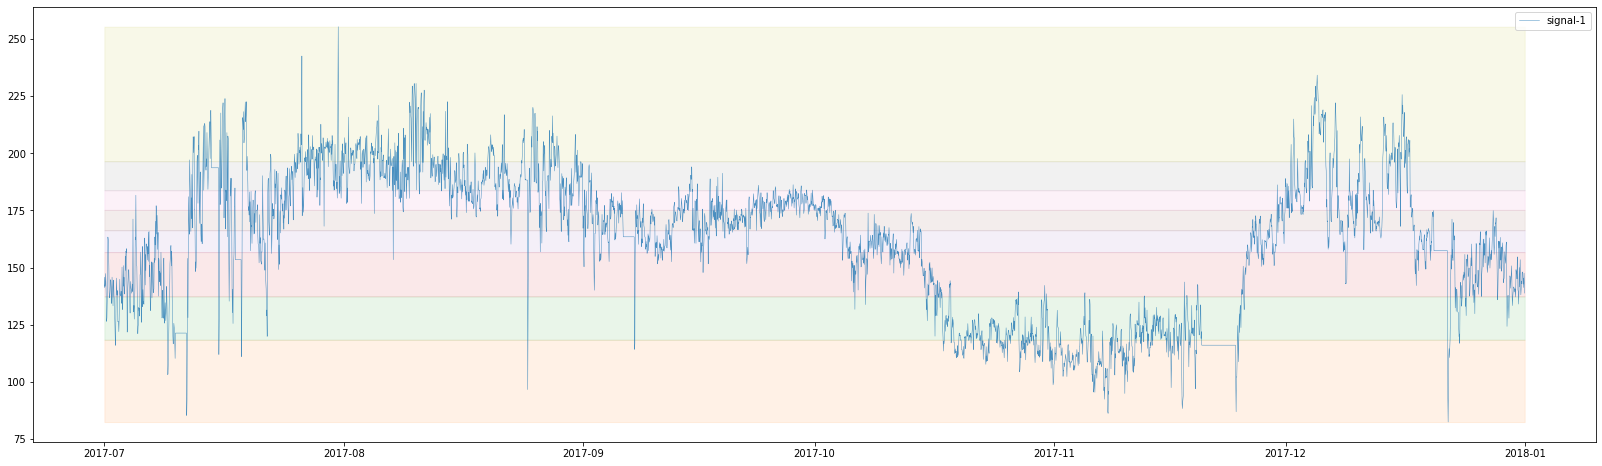

In [36]:
fig = tsia.plot.plot_timeseries_quantiles(df, bin_edges, label = 'signal-1')
plt.legend();

In [37]:
X_mtm = tsia.markov.markov_transition_matrix(X_binned)
X_mtm

array([[465.,  86.,   1.,   0.,   0.,   0.,   0.,   0.],
       [ 80., 405.,  63.,   2.,   0.,   2.,   0.,   0.],
       [  3.,  59., 379.,  96.,   9.,   2.,   2.,   1.],
       [  2.,   2.,  94., 352.,  75.,  19.,   6.,   2.],
       [  0.,   0.,  12.,  89., 314., 110.,  23.,   4.],
       [  0.,   0.,   0.,   9., 125., 312.,  86.,  20.],
       [  2.,   0.,   2.,   4.,  21.,  89., 320., 114.],
       [  0.,   0.,   0.,   0.,   8.,  18., 115., 411.]])

In [39]:
X_mtm = tsia.markov.markov_transition_probabilities(X_mtm)
np.round(X_mtm * 100, 1)

array([[84.2, 15.6,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ],
       [14.5, 73.4, 11.4,  0.4,  0. ,  0.4,  0. ,  0. ],
       [ 0.5, 10.7, 68.8, 17.4,  1.6,  0.4,  0.4,  0.2],
       [ 0.4,  0.4, 17. , 63.8, 13.6,  3.4,  1.1,  0.4],
       [ 0. ,  0. ,  2.2, 16.1, 56.9, 19.9,  4.2,  0.7],
       [ 0. ,  0. ,  0. ,  1.6, 22.6, 56.5, 15.6,  3.6],
       [ 0.4,  0. ,  0.4,  0.7,  3.8, 16.1, 58. , 20.7],
       [ 0. ,  0. ,  0. ,  0. ,  1.4,  3.3, 20.8, 74.5]])

In [41]:
def _markov_transition_field(X_binned, X_mtm, n_timestamps, n_bins):
    X_mtf = np.zeros((n_timestamps, n_timestamps))
    
    for i in prange(n_timestamps):
        for j in prange(n_timestamps):
            X_mtf[i, j] = X_mtm[X_binned[i], X_binned[j]]
            
    return X_mtf

X_mtf = _markov_transition_field(X_binned, X_mtm, n_timestamps, n_bins)
np.round(X_mtf * 100, 1)

array([[68.8, 68.8, 68.8, ..., 68.8, 68.8, 68.8],
       [68.8, 68.8, 68.8, ..., 68.8, 68.8, 68.8],
       [68.8, 68.8, 68.8, ..., 68.8, 68.8, 68.8],
       ...,
       [68.8, 68.8, 68.8, ..., 68.8, 68.8, 68.8],
       [68.8, 68.8, 68.8, ..., 68.8, 68.8, 68.8],
       [68.8, 68.8, 68.8, ..., 68.8, 68.8, 68.8]])

In [55]:
ran_row = np.round(X_mtf * 100, 1)[4]
ran_row[0:20]

array([68.8, 68.8, 68.8, 68.8, 68.8, 68.8, 10.7, 10.7, 10.7, 10.7, 68.8,
       17.4, 17.4, 17.4, 68.8, 68.8, 10.7, 68.8, 68.8, 68.8])

In [49]:
X_mtf.shape

(4416, 4416)

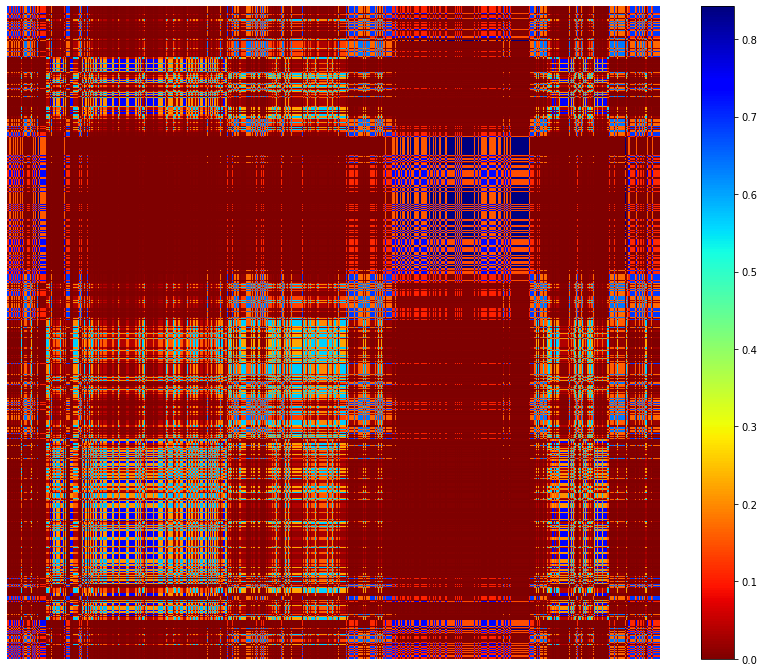

In [56]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(1,1,1)
_, mappable_image = tsia.plot.plot_markov_transition_field(mtf=X_mtf, ax=ax, reversed_cmap=True)
plt.colorbar(mappable_image);

In [59]:
image_size = 48
window_size, remainder = divmod(n_timestamps, image_size)

if remainder == 0:
    X_amtf = np.reshape(
        X_mtf, (image_size, window_size, image_size, window_size)
    ).mean(axis=(1, 3))
    
else:
    pass

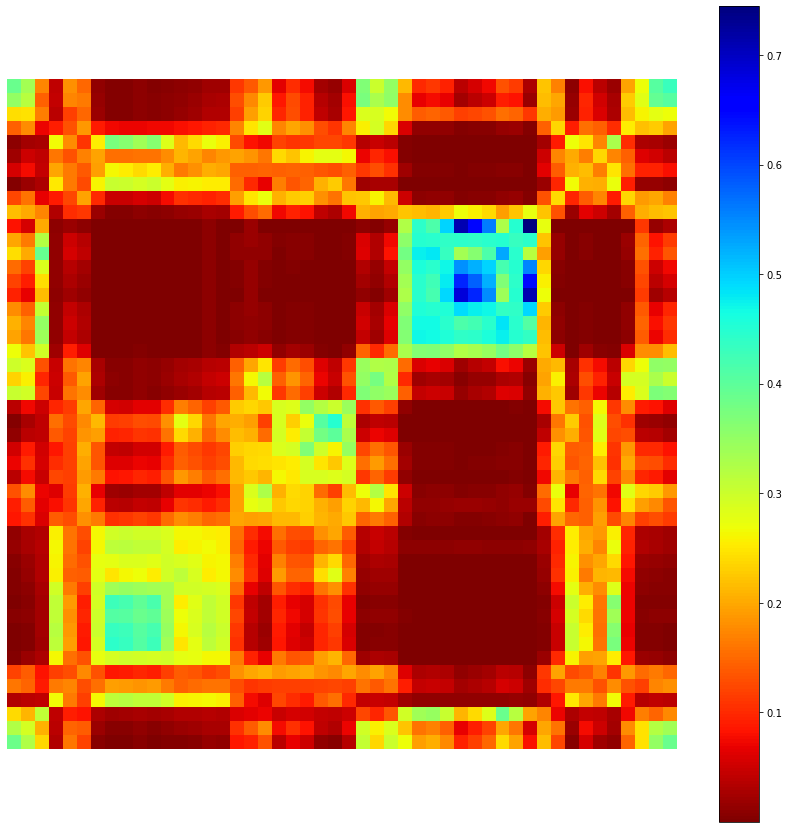

In [61]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
_, mappable_image = tsia.plot.plot_markov_transition_field(mtf=X_amtf, ax=ax, reversed_cmap=True)
plt.colorbar(mappable_image);

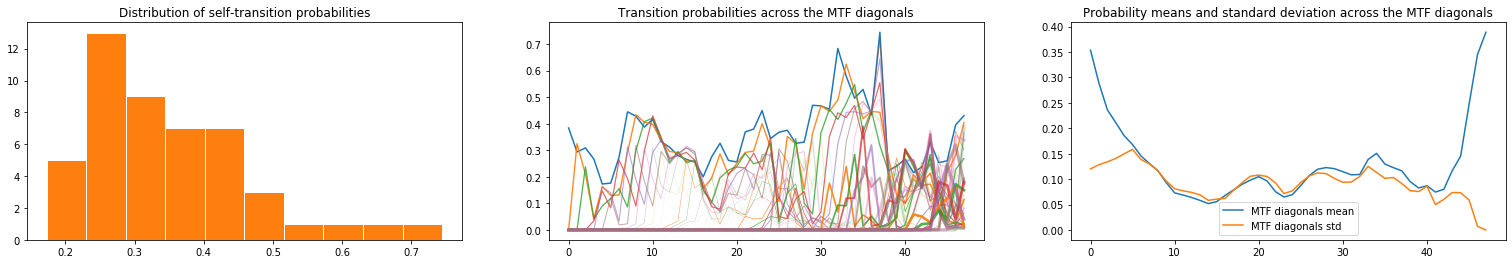

In [62]:
_ = tsia.plot.plot_mtf_metrics(X_amtf)

In [74]:
def colored_timeseries(tag, image_size = 96, colormap='jet'):

    df = pd.read_csv(os.path.join(DATA, f'{tag}.csv'))
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')
    df = df.set_index('timestamp')

    X = df.values.reshape(1, -1)
    mtf = MarkovTransitionField(image_size = 48, n_bins = n_bins, strategy = strategy)
    t_mtf = mtf.fit_transform(X)

    fig = plt.figure(figsize=(35, 15))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,4])

    ax = fig.add_subplot(gs[1])
    ax.set_title(f'Signal timeseries for tag {tag}')
    mtf_map = tsia.markov.get_mtf_map(df, t_mtf[0], reversed_cmap=True, step_size=0)
    _ = tsia.plot.plot_colored_timeseries(df, mtf_map, ax=ax)
        
    return t_mtf

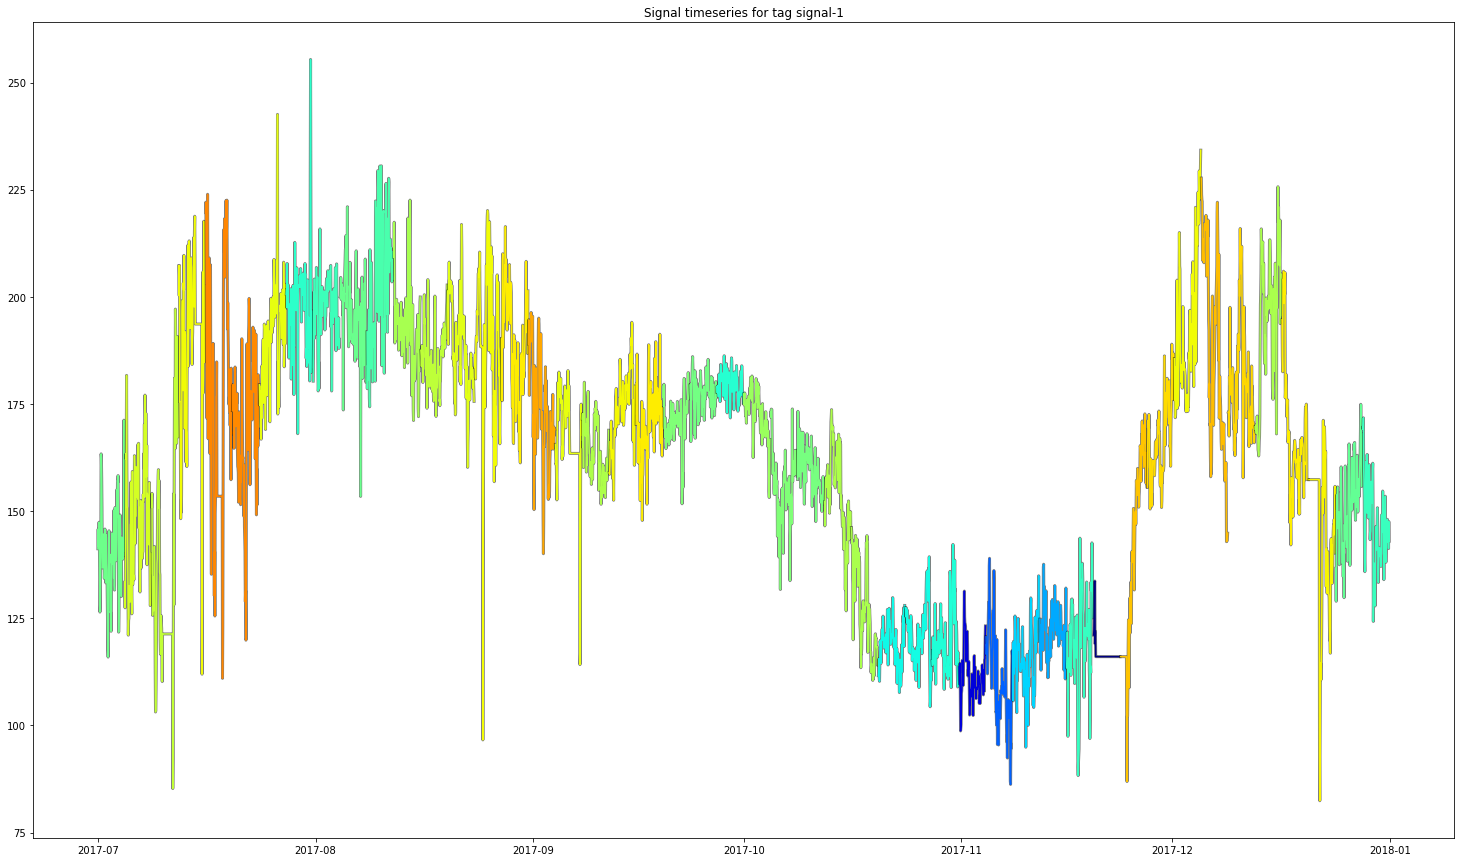

In [77]:
stats = []
mtf = colored_timeseries('signal-1', image_size = 8)
s.update({'Signal': 'signal-1'})
stats.append(s)

In [78]:
stats

[{'Average self-transition prob': 0.3535548390739762,
  'Std self-transition prob': 0.12009113721011686,
  'Average next transition prob': 0.2890082203197159,
  'Std next transition prob': 0.1283082290984957,
  'Average prob': 0.125,
  'Std prob': 0.12663908988171152,
  'Signal': 'signal-1'}]